#### Импорт библиотек и датасета

In [9]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import shapiro, levene, ttest_ind, spearmanr, pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/height_dataset.csv', delimiter=';', decimal=',')
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/student_lifestyle_dataset.csv')

#### Задание 1. Сравнения групп для моделированных данных


1. Дисперсии равны, средние НЕ отличаются
X1: среднее = 9.73, ст.откл. = 1.80
X2: среднее = 10.43, ст.откл. = 1.98

Нормальность (X1): p=0.791 - да
Нормальность (X2): p=0.894 - да
Равенство дисперсий: p=0.819 - да
Равенство средних: p=0.030 - нет


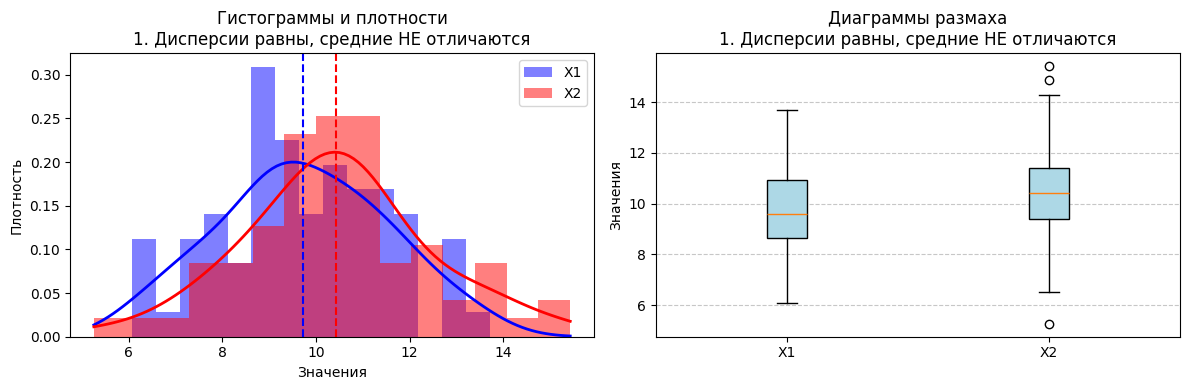


2. Дисперсии равны, средние отличаются
X1: среднее = 9.73, ст.откл. = 1.80
X2: среднее = 12.93, ст.откл. = 1.98

Нормальность (X1): p=0.791 - да
Нормальность (X2): p=0.894 - да
Равенство дисперсий: p=0.819 - да
Равенство средних: p=0.000 - нет


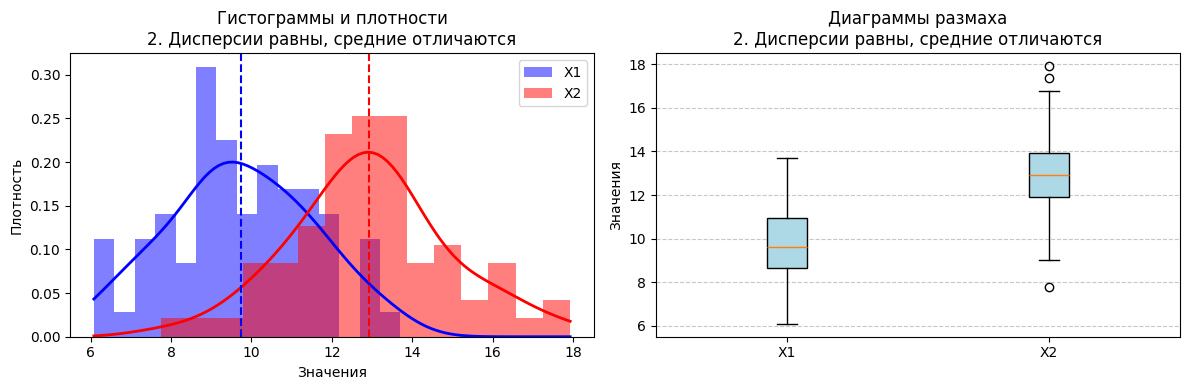


3. Дисперсии НЕ равны, средние НЕ отличаются
X1: среднее = 9.73, ст.откл. = 1.80
X2: среднее = 10.37, ст.откл. = 3.95

Нормальность (X1): p=0.791 - да
Нормальность (X2): p=0.894 - да
Равенство дисперсий: p=0.000 - нет
Равенство средних: p=0.224 - да


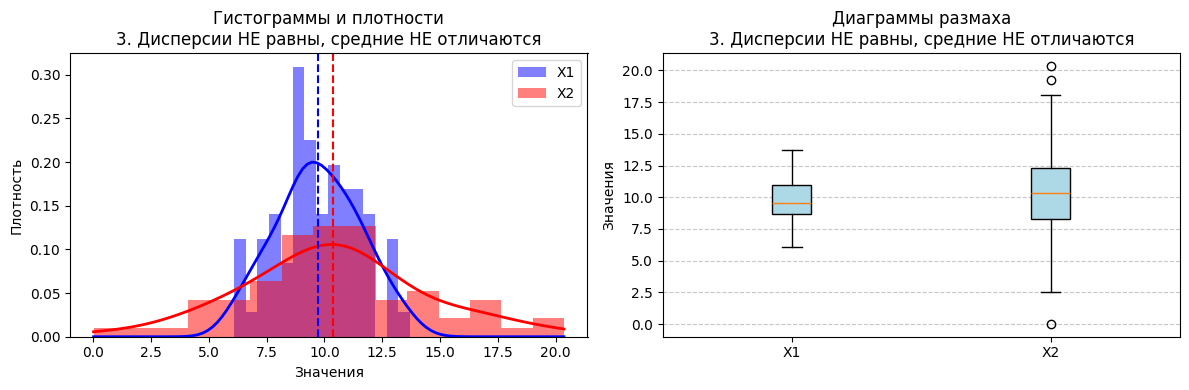


4. Дисперсии НЕ равны, средние отличаются
X1: среднее = 9.73, ст.откл. = 1.80
X2: среднее = 12.87, ст.откл. = 3.95

Нормальность (X1): p=0.791 - да
Нормальность (X2): p=0.894 - да
Равенство дисперсий: p=0.000 - нет
Равенство средних: p=0.000 - нет


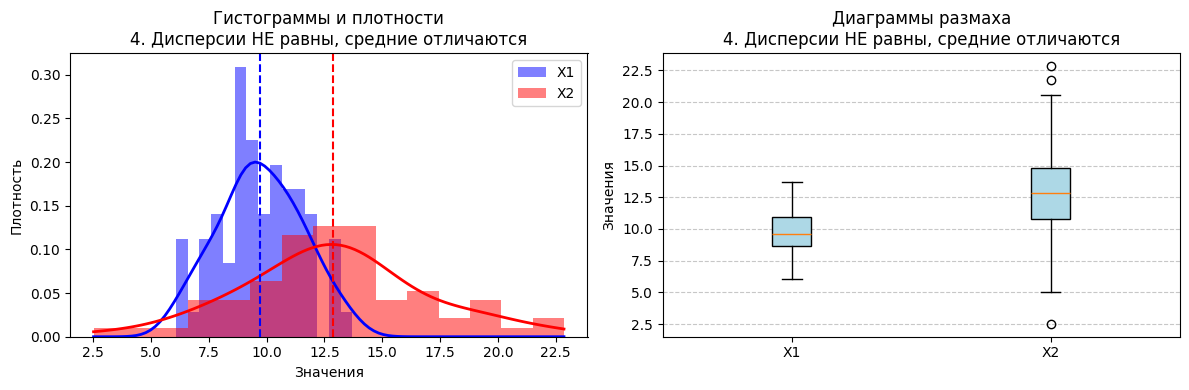

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import shapiro, levene, ttest_ind

# Настройка стиля для графиков
plt.rcParams['figure.figsize'] = (12, 5)

def analyze_situation(a1, sigma1, a2, sigma2, n1, n2, situation_name):
    """
    a1, sigma1 - среднее и стандартное отклонение для первой выборки
    a2, sigma2 - среднее и стандартное отклонение для второй выборки
    n1, n2 - объемы выборок
    situation_name - название текущей ситуации
    """
    # Анализ двух выборок из нормальных распределений
    np.random.seed(42)
    x1 = np.random.normal(a1, sigma1, n1)
    x2 = np.random.normal(a2, sigma2, n2)

    print(f"\n{situation_name}")
    print(f"X1: среднее = {np.mean(x1):.2f}, ст.откл. = {np.std(x1, ddof=1):.2f}")
    print(f"X2: среднее = {np.mean(x2):.2f}, ст.откл. = {np.std(x2, ddof=1):.2f}")

    # 1. Проверка нормальности
    shapiro_x1 = shapiro(x1)
    shapiro_x2 = shapiro(x2)
    print(f"\nНормальность (X1): p={shapiro_x1.pvalue:.3f} - {'да' if shapiro_x1.pvalue>0.05 else 'нет'}")
    print(f"Нормальность (X2): p={shapiro_x2.pvalue:.3f} - {'да' if shapiro_x2.pvalue>0.05 else 'нет'}")

    # 2. Проверка равенства дисперсий
    levene_test = levene(x1, x2)
    print(f"Равенство дисперсий: p={levene_test.pvalue:.3f} - {'да' if levene_test.pvalue>0.05 else 'нет'}")

    # 3. Проверка равенства средних
    ttest = ttest_ind(x1, x2, equal_var=(levene_test.pvalue > 0.05))
    print(f"Равенство средних: p={ttest.pvalue:.3f} - {'да' if ttest.pvalue>0.05 else 'нет'}")

    # График 1: Гистограммы + плотности + средние
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.hist(x1, bins=15, density=True, alpha=0.5, color='blue', label='X1')
    plt.hist(x2, bins=15, density=True, alpha=0.5, color='red', label='X2')

    # Плотности
    x_range = np.linspace(min(x1.min(), x2.min()), max(x1.max(), x2.max()), 100)
    plt.plot(x_range, stats.gaussian_kde(x1)(x_range), 'b-', linewidth=2)
    plt.plot(x_range, stats.gaussian_kde(x2)(x_range), 'r-', linewidth=2)

    # Средние
    plt.axvline(np.mean(x1), color='blue', linestyle='--', linewidth=1.5)
    plt.axvline(np.mean(x2), color='red', linestyle='--', linewidth=1.5)

    plt.title(f'Гистограммы и плотности\n{situation_name}')
    plt.xlabel('Значения')
    plt.ylabel('Плотность')
    plt.legend()

    # График 2: Диаграммы размаха
    plt.subplot(1, 2, 2)
    plt.boxplot([x1, x2], tick_labels=['X1', 'X2'], patch_artist=True,
                boxprops=dict(facecolor='lightblue'))
    plt.title(f'Диаграммы размаха\n{situation_name}')
    plt.ylabel('Значения')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

# Параметры выборок
n = 70

# Четыре ситуации
params = [
    (10, 2, 10.5, 2, "1. Дисперсии равны, средние НЕ отличаются"),
    (10, 2, 13, 2,   "2. Дисперсии равны, средние отличаются"),
    (10, 2, 10.5, 4, "3. Дисперсии НЕ равны, средние НЕ отличаются"),
    (10, 2, 13, 4,   "4. Дисперсии НЕ равны, средние отличаются")
]

# Запуск анализа для всех ситуаций
for a1, s1, a2, s2, name in params:
    analyze_situation(a1, s1, a2, s2, n, n, name)

#### Задание 2. Сравнение групп для реальных данных

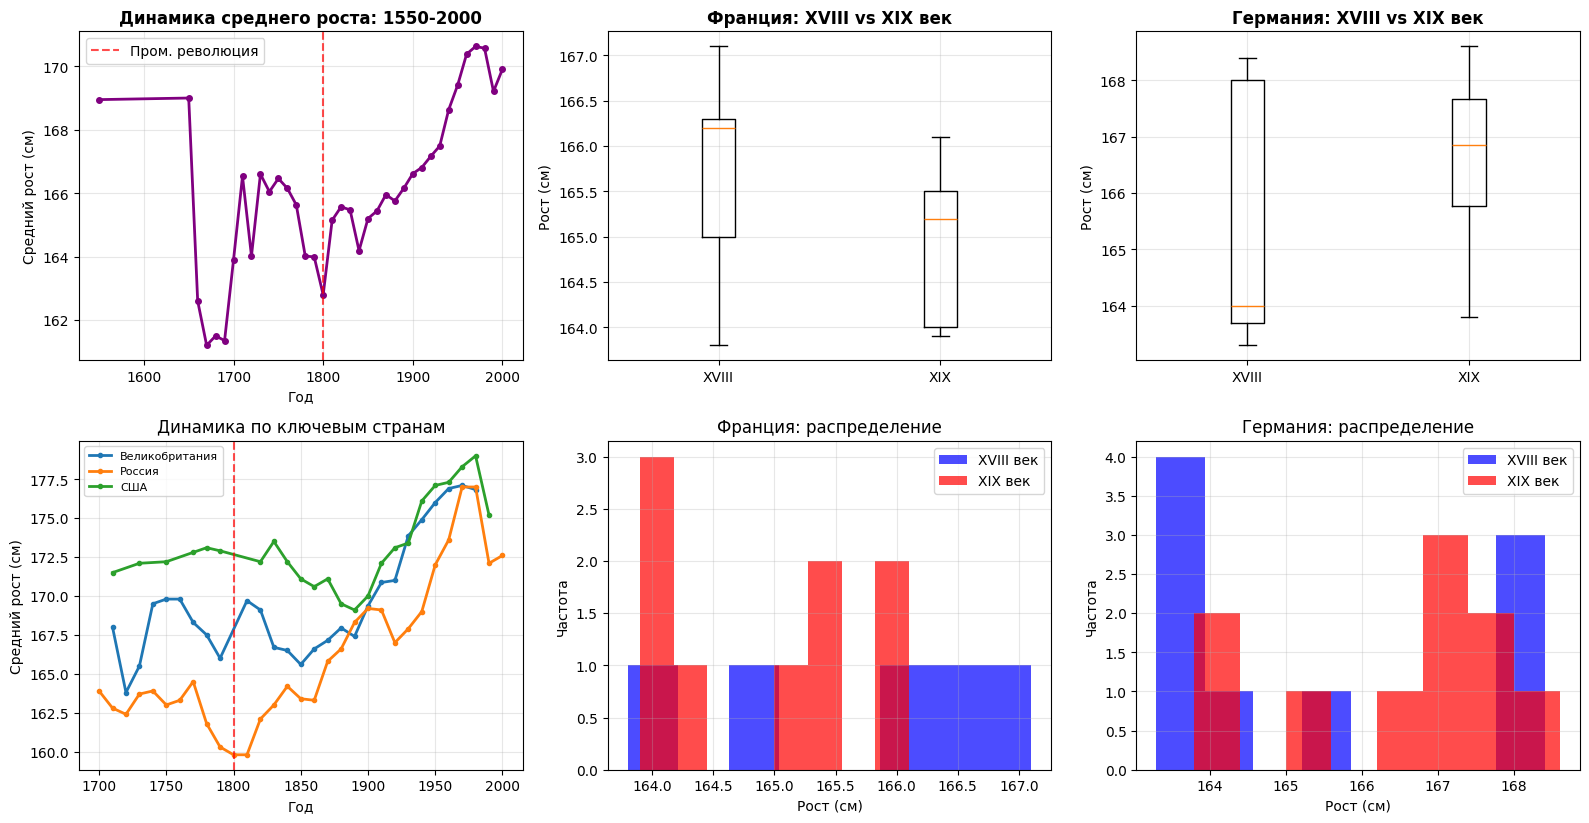

In [ ]:
# Подготовка данных для гипотез
france = df[df['ccode'] == 250].copy()
france['century'] = (france['year'] // 100) * 100
france_18 = france[(france['century'] >= 1700) & (france['century'] < 1800)]['value'].dropna()
france_19 = france[(france['century'] >= 1800) & (france['century'] < 1900)]['value'].dropna()

germany = df[df['ccode'] == 276].copy()
germany['century'] = (germany['year'] // 100) * 100
germany_18 = germany[(germany['century'] >= 1700) & (germany['century'] < 1800)]['value'].dropna()
germany_19 = germany[(germany['century'] >= 1800) & (germany['century'] < 1900)]['value'].dropna()

before = df[df['year'] < 1800]['value'].dropna()
after = df[df['year'] >= 1800]['value'].dropna()

# СОЗДАЕМ МНОГО ГРАФИКОВ
plt.figure(figsize=(16, 12))

# 1. ГРАФИК СРЕДНЕГО РОСТА С САМОГО НАЧАЛА ДО КОНЦА
plt.subplot(3, 3, 1)
yearly_mean = df.groupby('year')['value'].mean().reset_index()
plt.plot(yearly_mean['year'], yearly_mean['value'], 'o-', color='purple', linewidth=2, markersize=4)
plt.axvline(x=1800, color='red', linestyle='--', alpha=0.7, label='Пром. революция')
plt.xlabel('Год')
plt.ylabel('Средний рост (см)')
plt.title('Динамика среднего роста: 1550-2000', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend()

# 2. Боксплоты для всех гипотез
plt.subplot(3, 3, 2)
plt.boxplot([france_18, france_19], tick_labels=['XVIII', 'XIX'])
plt.title('Франция: XVIII vs XIX век', fontsize=12, fontweight='bold')
plt.ylabel('Рост (см)')
plt.grid(True, alpha=0.3)

plt.subplot(3, 3, 3)
plt.boxplot([germany_18, germany_19], tick_labels=['XVIII', 'XIX'])
plt.title('Германия: XVIII vs XIX век', fontsize=12, fontweight='bold')
plt.ylabel('Рост (см)')
plt.grid(True, alpha=0.3)

# 3. Гистограммы
plt.subplot(3, 3, 5)
plt.hist(france_18, alpha=0.7, label='XVIII век', bins=8, color='blue')
plt.hist(france_19, alpha=0.7, label='XIX век', bins=8, color='red')
plt.title('Франция: распределение')
plt.xlabel('Рост (см)')
plt.ylabel('Частота')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(3, 3, 6)
plt.hist(germany_18, alpha=0.7, label='XVIII век', bins=8, color='blue')
plt.hist(germany_19, alpha=0.7, label='XIX век', bins=8, color='red')
plt.title('Германия: распределение')
plt.xlabel('Рост (см)')
plt.ylabel('Частота')
plt.legend()
plt.grid(True, alpha=0.3)

# 4. График динамики по ключевым странам
plt.subplot(3, 3, 4)
key_countries = [826, 643, 840]
country_names = {826: 'Великобритания', 643: 'Россия', 840: 'США'}

for ccode in key_countries:
    country_data = df[df['ccode'] == ccode].groupby('year')['value'].mean().reset_index()
    plt.plot(country_data['year'], country_data['value'], 'o-', linewidth=2, markersize=3, label=country_names[ccode])

plt.axvline(x=1800, color='red', linestyle='--', alpha=0.7)
plt.xlabel('Год')
plt.ylabel('Средний рост (см)')
plt.title('Динамика по ключевым странам')
plt.legend(fontsize=8)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Результаты тестов

### 1. Сравнение роста в Европе (XVIII vs XIX века)

| Страна | Результат |
|--------|-----------|
| **Франция** | $\color{red}{\text{Статистически значимых различий не обнаружено}}$ |
| **Германия** | $\color{red}{\text{Статистически значимых различий не обнаружено}}$ |

---

### 2. Влияние промышленной революции (после 1800 г.)

$\color{green}{\text{Обнаружены статистически значимые различия}}$

*Промышленная революция оказала существенное влияние на антропометрические показатели населения.*

---

### 3. Динамика ключевых стран

#### Основные наблюдения:

- **Конвергенция показателей**: К концу исследуемого периода все страны достигли схожих значений роста

- **Влияние промышленной революции**: Индустриализация ускорила положительную динамику антропометрических показателей

- **Лидеры роста**: Россия продемонстрировала наибольший абсолютный прирост показателей за исследуемый период

---

#### ***Итоговый вывод:***
Промышленная революция стала катализатором изменений в физическом развитии населения Европы, при этом наиболее выраженная положительная динамика наблюдалась в России.

#### Задание 3. Для своего набора данных провести корреляционный анализ признаков. Сделать выводы.

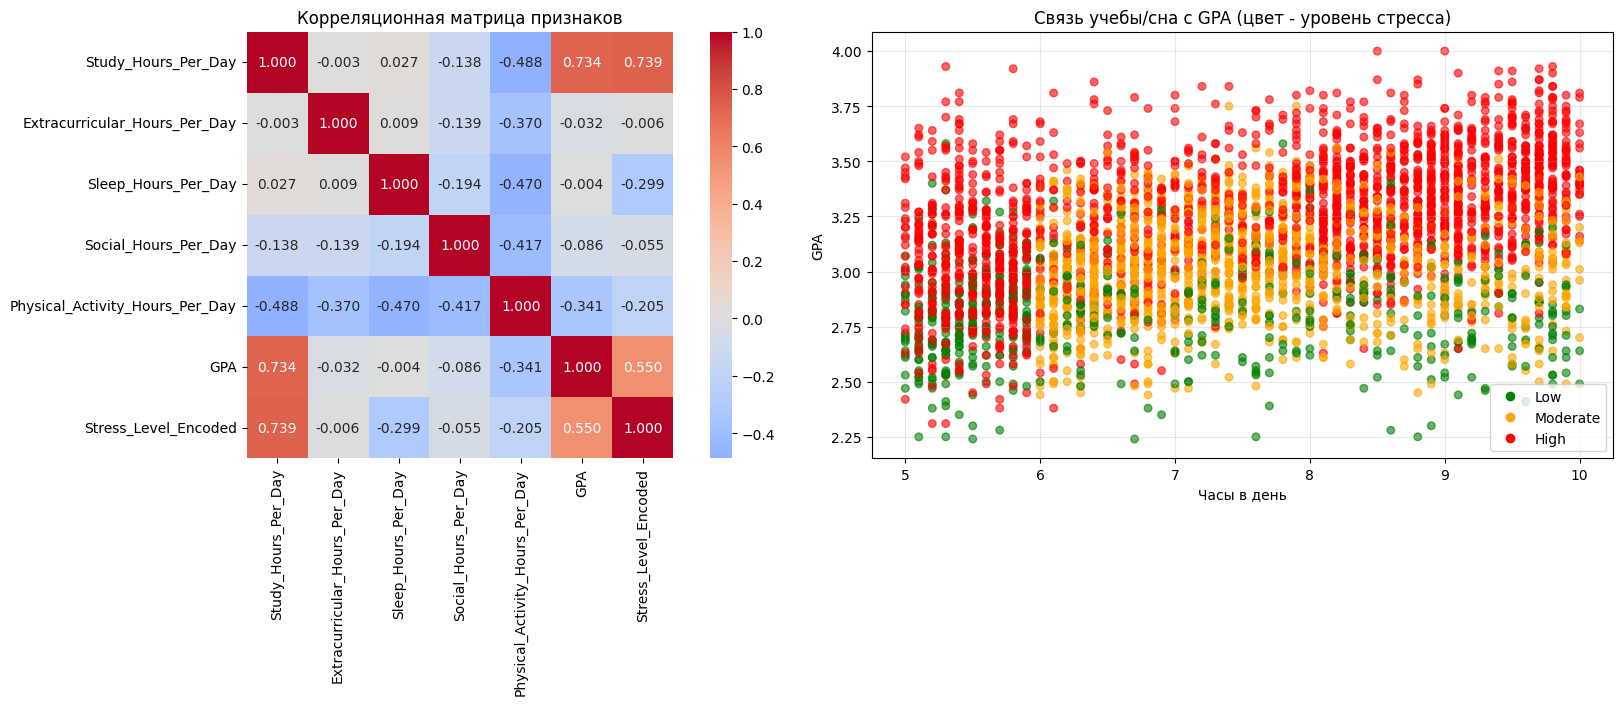

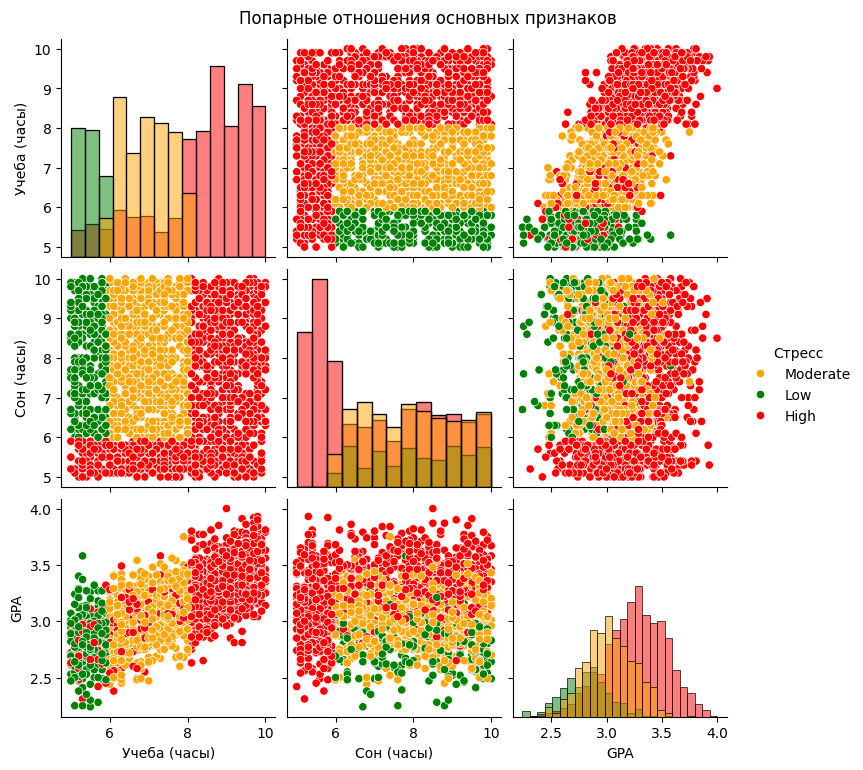

In [11]:
# Кодирование уровня стресса
stress_mapping = {'Low': 1, 'Moderate': 2, 'High': 3}
df2['Stress_Level_Encoded'] = df2['Stress_Level'].map(stress_mapping)

# Выбор признаков для анализа
features = ['Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day',
            'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day',
            'Physical_Activity_Hours_Per_Day', 'GPA', 'Stress_Level_Encoded']

# Расчет корреляционной матрицы
corr_matrix = df2[features].corr()

# Создание фигуры с двумя подграфиками
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Тепловая карта
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm',
            center=0, square=True, ax=axes[0])
axes[0].set_title('Корреляционная матрица признаков')

# График рассеивания для ключевых признаков

key_features = ['Study_Hours_Per_Day', 'Sleep_Hours_Per_Day', 'GPA']
colors = {'Low': 'green', 'Moderate': 'orange', 'High': 'red'}

for feature in key_features[:-1]:  # Исключаем GPA из цикла
    axes[1].scatter(df2[feature], df2['GPA'],
                   c=df2['Stress_Level'].map(colors),
                   alpha=0.6, s=30)

axes[1].set_xlabel('Часы в день')
axes[1].set_ylabel('GPA')
axes[1].set_title('Связь учебы/сна с GPA (цвет - уровень стресса)')
axes[1].legend(handles=[plt.Line2D([0], [0], marker='o', color='w',
                                   markerfacecolor=color, label=level, markersize=8)
                       for level, color in colors.items()])
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Создаем датафрейм только с нужными признаками
pairplot_df = df2[['Study_Hours_Per_Day', 'Sleep_Hours_Per_Day', 'GPA', 'Stress_Level']].copy()
pairplot_df.columns = ['Учеба (часы)', 'Сон (часы)', 'GPA', 'Стресс']

# Строим парные графики
sns.pairplot(pairplot_df, hue='Стресс', palette=colors, diag_kind='hist')
plt.suptitle('Попарные отношения основных признаков', y=1.02)
plt.show()

# Общие выводы по корреляционному анализу

На основе анализа корреляционной матрицы и визуализаций можно сделать следующие выводы:

1. **Учебная нагрузка** имеет сильную положительную связь как с GPA *(r = 0.734)*, так и с уровнем стресса *(r = 0.739)*. Больше времени на учебу = выше успеваемость, но и выше стресс.

2. **Физическая активность** отрицательно коррелирует с большинством других активностей (учеба, сон, общение) и со стрессом *(r = -0.341)*. Спорт занимает время, но помогает снижать стресс.

3. **Сон и социальная активность** слабо связаны с GPA, но имеют умеренную отрицательную связь со стрессом.

**Общий вывод**: студенты вынуждены искать баланс между учебой *(успеваемость)*, сном/спортом/общением и уровнем стресса.

---

# Выводы по графику рассеивания

Анализ графика «Связь учебы/сна с GPA» показывает:

1. **Четкая кластеризация по стрессу**:
   - Студенты с **низким стрессом** *(зеленые)* равномерно распределены по всему диапазону GPA
   - Студенты с **высоким стрессом** *(красные)* концентрируются в зоне высоких учебных часов

2. **Зона риска**: Студенты с учебной нагрузкой >8 часов в день практически все имеют высокий уровень стресса, независимо от GPA.

3. **Влияние сна**: При снижении сна ниже 6 часов наблюдается преимущественно высокий уровень стресса, даже при средних показателях учебы.

**Общий вывод**: Студенты с высоким GPA и низким уровнем стресса имеют умеренные показатели учебной нагрузки и достаточный сон.